In [4]:
#import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [6]:
admission = [32, 28, 35, 30, 29, 27, 31, 34, 33, 30]
# Convert to pandas Series
admission_series = pd.Series(admission)

In [8]:
# Compute mean, median, mode
mean_val = admission_series.mean()
median_val = admission_series.median()
mode_val = admission_series.mode().tolist()  # mode can be multimodal

In [12]:
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

Mean: 30.9
Median: 30.5
Mode: [30]


# Determine which measure best represents the data

In [14]:

print("\nMeasure of central tendency that best represents the data:")
if len(mode_val) == 1 and abs(mean_val - mode_val[0]) < 1 and abs(median_val - mode_val[0]) < 1:
    print("→ Mode, mean, and median are close. All represent the data well.")
else:
    print("→ Median is generally best when there's variation or outliers.")


Measure of central tendency that best represents the data:
→ Mode, mean, and median are close. All represent the data well.


# Increase admissions by 10%

In [18]:
increased_admissions = [int(x * 1.10) for x in admissions]
increased_series = pd.Series(increased_admissions)

In [20]:
# New central tendencies
new_mean = increased_series.mean()
new_median = increased_series.median()
new_mode = increased_series.mode().tolist()

In [22]:
print("\nAfter 10% increase in admission capacity:")
print(f"New Mean: {new_mean}")
print(f"New Median: {new_median}")
print(f"New Mode: {new_mode}")


After 10% increase in admission capacity:
New Mean: 33.6
New Median: 33.5
New Mode: [33]


TASK 1 INSIGHTS: A 10% increase in admissions scales the entire dataset up, and all three measures (mean, median, mode) will increase proportionally.
Since the data is symmetric and without outliers, mean may best represent patient admissions.

#TASK 2:  The recovery duration (in days) of 10 patients who underwent the same surgery is
recorded as follows:#



In [30]:
# Original data
recovery_days = [5, 7, 6, 8, 9, 5, 6, 7, 8, 6]
recovery_series = pd.Series(recovery_days)

# Range
range_val = recovery_series.max() - recovery_series.min()

# Variance and Standard Deviation
variance_val = recovery_series.var(ddof=1)
std_dev = recovery_series.std(ddof=1)

print(f"Range: {range_val}")
print(f"Variance: {variance_val:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Range: 4
Variance: 1.79
Standard Deviation: 1.34


In [32]:
print("\nInterpretation of Standard Deviation:")
if std_dev < 1.5:
    print("→ Low variability: Recovery times are fairly consistent.")
else:
    print("→ High variability: Recovery times differ widely.")


Interpretation of Standard Deviation:
→ Low variability: Recovery times are fairly consistent.


In [34]:
# Updated data
updated_recovery_days = recovery_days + [4, 10]
updated_series = pd.Series(updated_recovery_days)
updated_std_dev = updated_series.std(ddof=1)

In [38]:
print(f"After adding 4 and 10 day recoveries:")
print(f"New Standard Deviation: {updated_std_dev:.2f}")

if updated_std_dev > std_dev:
    print("→ The standard deviation has increased, indicating more variability due to added extreme values.")

After adding 4 and 10 day recoveries:
New Standard Deviation: 1.76
→ The standard deviation has increased, indicating more variability due to added extreme values.


TASK 2 INSIGHTS:Standard Deviation tells how spread out the recovery times are.
Low std deviation means patients recover in similar timeframes.
Adding 4 and 10, which are far from the mean, increases variability, thus increasing standard deviation.

# ----------------------------
# 🎨 Visualization
# ----------------------------

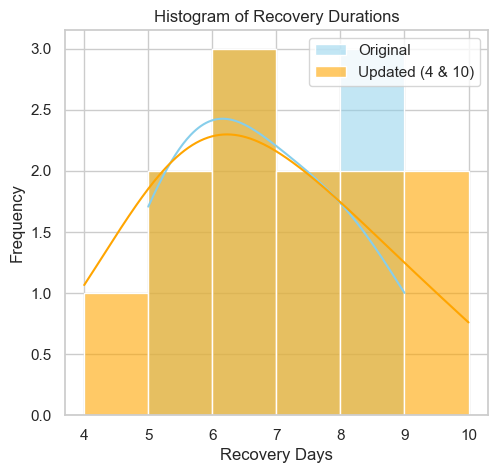

In [40]:
# Set seaborn theme
sns.set(style="whitegrid")
# Plot: Histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(recovery_series, kde=True, color='skyblue', label='Original', binwidth=1)
sns.histplot(updated_series, kde=True, color='orange', label='Updated (4 & 10)', binwidth=1, alpha=0.6)
plt.title("Histogram of Recovery Durations")
plt.xlabel("Recovery Days")
plt.ylabel("Frequency")
plt.legend()

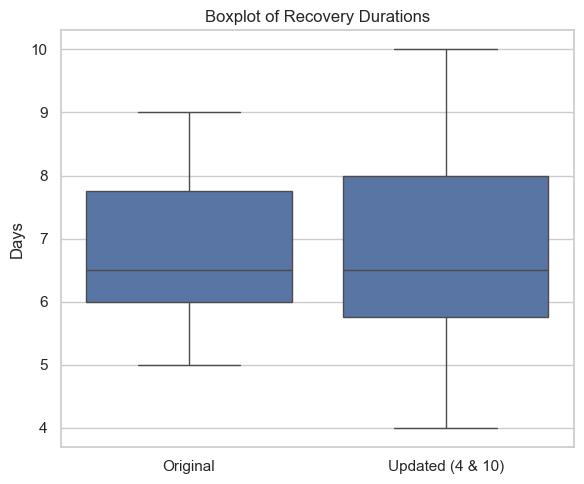

In [56]:
# Prepare data for boxplot in long format
combined_data = pd.DataFrame({'Recovery Days': recovery_series.tolist() + updated_series.tolist(),
    'Group': ['Original'] * len(recovery_series) + ['Updated (4 & 10)'] * len(updated_series)
})

# Plot boxplot using seaborn
plt.figure(figsize=(6, 5))
sns.boxplot(x='Group', y='Recovery Days', data=combined_data)
plt.title("Boxplot of Recovery Durations")
plt.ylabel("Days")
plt.xlabel("")

plt.tight_layout()
plt.show()

TASK 3:Patient satisfaction scores

In [58]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Patient satisfaction scores
scores = [8, 9, 7, 8, 10, 7, 9, 6, 10, 8, 7, 9]
score_series = pd.Series(scores)

# Compute skewness and kurtosis
skewness = skew(score_series)
kurt = kurtosis(score_series)  # excess kurtosis
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")

Skewness: -0.04
Kurtosis: -1.01


In [60]:
# Interpretation
if abs(skewness) < 0.5:
    print("→ The distribution is approximately symmetric (normal).")
elif skewness > 0:
    print("→ The data is positively skewed (tail on right).")
else:
    print("→ The data is negatively skewed (tail on left).")

→ The distribution is approximately symmetric (normal).


In [62]:
if kurt > 0:
    print("→ The distribution is leptokurtic (sharper peak than normal).")
elif kurt < 0:
    print("→ The distribution is platykurtic (flatter than normal).")
else:
    print("→ The distribution is mesokurtic (normal peak).")

→ The distribution is platykurtic (flatter than normal).


In [66]:
# Expected change after service improvement
print("If scores shift higher after a new initiative:")
print("→ We'd expect negative skewness (more high scores, tail on the left).")

If scores shift higher after a new initiative:
→ We'd expect negative skewness (more high scores, tail on the left).


# -----------------------------
# 🎨 Plot: Histogram + KDE
# -----------------------------

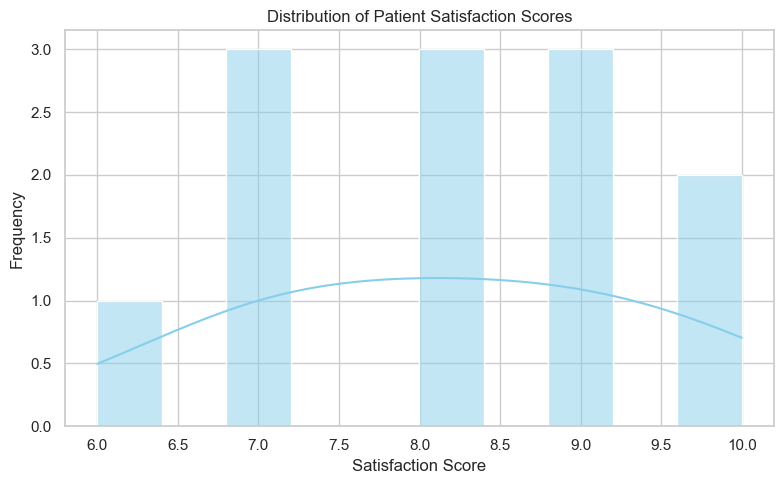

In [71]:
plt.figure(figsize=(8, 5))
sns.histplot(score_series, bins=10, kde=True, color='skyblue')
plt.title("Distribution of Patient Satisfaction Scores")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

TASK 4. HealthCare Plus wants to analyze the relationship between nurse staffing levels and
patient recovery time.

Correlation Coefficient: -1.00
→ Negative correlation: As nurse count increases, recovery time decreases.

If nurses increase by 5 per department:
→ Based on the strong negative correlation, we expect recovery time to decrease further.


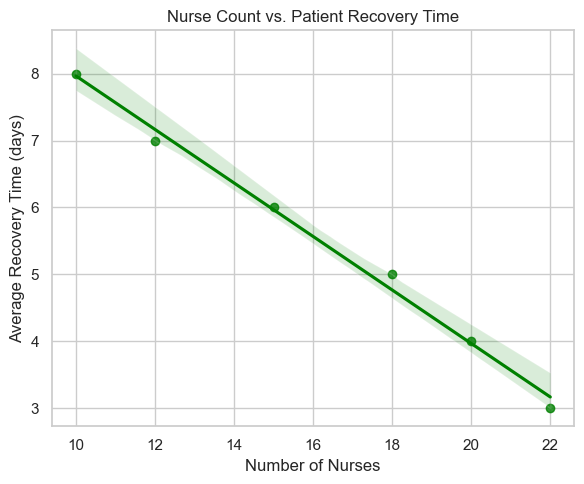

In [75]:
# Step 1: Input data
data = {
    'Nurses': [10, 12, 15, 18, 20, 22],
    'Recovery_Days': [8, 7, 6, 5, 4, 3]
}
df = pd.DataFrame(data)

# Step 2: Calculate correlation
correlation = df['Nurses'].corr(df['Recovery_Days'])
print(f"Correlation Coefficient: {correlation:.2f}")

# Step 3: Interpretation
if correlation < 0:
    print("→ Negative correlation: As nurse count increases, recovery time decreases.")
elif correlation > 0:
    print("→ Positive correlation: As nurse count increases, recovery time also increases.")
else:
    print("→ No correlation: No clear pattern between nurse count and recovery time.")

# Step 4: Trend Interpretation
print("\nIf nurses increase by 5 per department:")
print("→ Based on the strong negative correlation, we expect recovery time to decrease further.")

# Visualize the trend
plt.figure(figsize=(6, 5))
sns.regplot(x='Nurses', y='Recovery_Days', data=df, color='green')
plt.title("Nurse Count vs. Patient Recovery Time")
plt.xlabel("Number of Nurses")
plt.ylabel("Average Recovery Time (days)")
plt.grid(True)
plt.tight_layout()
plt.show()


TASK 4 INSIGHTS: Correlation Coefficient will be strongly negative (close to -1), showing that:

More nurses = faster patient recovery

Increasing nurses by 5 (e.g., from 20 to 25) will likely continue the downward trend in recovery time — possibly from 4 to 2 or 3 days, if the trend is linear.

*TASK 5*

In [80]:
import numpy as np
from scipy.stats import ttest_1samp

# Data
wait_times = [32, 29, 31, 34, 33, 27, 30, 28, 35, 26]
claimed_mean = 30

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(wait_times, popmean=claimed_mean)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("→ Reject the null hypothesis: The average wait time is significantly different from 30 minutes.")
else:
    print("→ Fail to reject the null hypothesis: There is no significant difference from 30 minutes.")


T-statistic: 0.52
P-value: 0.6141
→ Fail to reject the null hypothesis: There is no significant difference from 30 minutes.


**TASK 5 INSIGHTS:**
If p-value < 0.05, we reject H₀ → hospital’s claim is not valid.

If p-value ≥ 0.05, we fail to reject H₀ → claim is valid.

**TASK 6. A survey on hospital cleanliness and patient satisfaction**

Chi-Square Statistic: 75.00
P-value: 0.0000
Degrees of Freedom: 2

Expected Frequencies Table:
        Satisfied  Unsatisfied
High         60.0         40.0
Medium       60.0         40.0
Low          60.0         40.0

→ Reject the null hypothesis: Cleanliness and satisfaction are dependent.


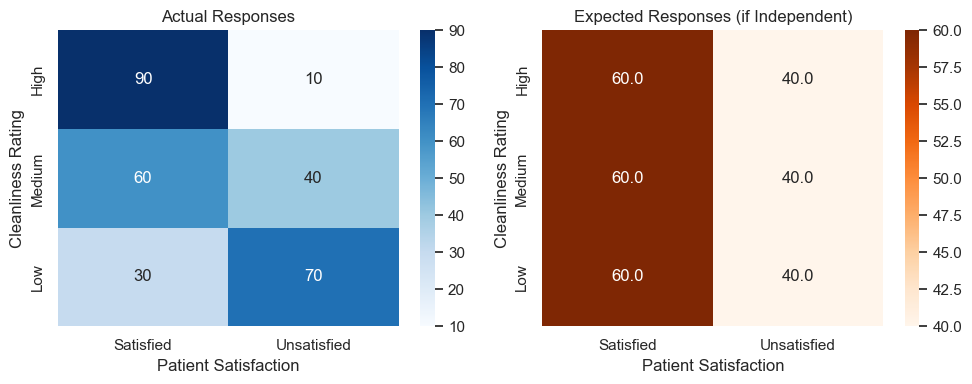

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Construct the contingency table
data = [[90, 10],
        [60, 40],
        [30, 70]]
columns = ['Satisfied', 'Unsatisfied']
index = ['High', 'Medium', 'Low']

df = pd.DataFrame(data, columns=columns, index=index)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(df)
expected_df = pd.DataFrame(expected, columns=columns, index=index)

print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, columns=columns, index=index))

# Conclusion
alpha = 0.05
if p < alpha:
    print("\n→ Reject the null hypothesis: Cleanliness and satisfaction are dependent.")
else:
    print("\n→ Fail to reject the null hypothesis: No significant relationship found.")

# Plot heatmaps
plt.figure(figsize=(10, 4))

# Heatmap for actual values
plt.subplot(1, 2, 1)
sns.heatmap(df, annot=True, fmt="d", cmap="Blues")
plt.title("Actual Responses")
plt.xlabel("Patient Satisfaction")
plt.ylabel("Cleanliness Rating")

# Heatmap for expected values
plt.subplot(1, 2, 2)
sns.heatmap(expected_df, annot=True, fmt=".1f", cmap="Oranges")
plt.title("Expected Responses (if Independent)")
plt.xlabel("Patient Satisfaction")
plt.ylabel("Cleanliness Rating")

plt.tight_layout()
plt.show()

**TASK 6 INSIGHTS :If p-value < 0.05, we reject H₀ → cleanliness and satisfaction are related.
If cleanliness improves, we expect:
More patients to report satisfaction.
Fewer patients to report dissatisfaction, especially in the High category.The distribution will shift toward more satisfied patients, especially in the "High" and "Medium" ratings.**

"Low cleanliness" row should shrink in future surveys if hygiene improves.

**TASK 7. The hospital tested three different treatment methods (A, B, and C) for managing
post-surgery pain.**

In [94]:
import scipy.stats as stats

# Data
treatment_A = [5, 6, 7, 5, 6]
treatment_B = [8, 9, 7, 8, 10]
treatment_C = [4, 5, 6, 5, 4]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(treatment_A, treatment_B, treatment_C)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("→ Reject the null hypothesis: At least one treatment differs significantly.")
else:
    print("→ Fail to reject the null hypothesis: No significant difference among treatments.")


F-statistic: 19.19
P-value: 0.0002
→ Reject the null hypothesis: At least one treatment differs significantly.


**TASK 7.INSIGHT: If p-value < 0.05, there's a statistically significant difference in recovery times between treatments.
If not, the differences may be due to random variation.**

#If the hospital introduces a new treatment (D), what data should be collected
before concluding its effectiveness?#

In [102]:
import scipy.stats as stats

# Existing treatments
treatment_A = [5, 6, 7, 5, 6]
treatment_B = [8, 9, 7, 8, 10]
treatment_C = [4, 5, 6, 5, 4]

# New Treatment D
treatment_D = [5, 4, 6, 5, 5]

# Perform ANOVA including Treatment D
f_stat, p_value = stats.f_oneway(treatment_A, treatment_B, treatment_C, treatment_D)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("→ Reject the null hypothesis: At least one treatment differs significantly.")
else:
    print("→ Fail to reject the null hypothesis: No significant difference among treatments.")


F-statistic: 17.17
P-value: 0.0000
→ Reject the null hypothesis: At least one treatment differs significantly.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16640\3227228750.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Treatment', y='Recovery_Days', data=df, palette='Set2')


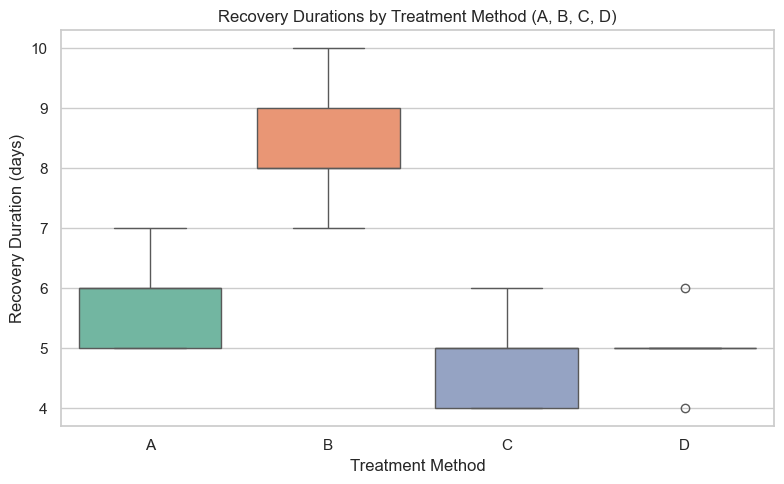

In [104]:
# ----------------------
# 📊 Boxplot Visualization
# ----------------------
# Combine all data into a DataFrame
df = pd.DataFrame({
    'Recovery_Days': treatment_A + treatment_B + treatment_C + treatment_D,
    'Treatment': (['A'] * len(treatment_A)) +
                 (['B'] * len(treatment_B)) +
                 (['C'] * len(treatment_C)) +
                 (['D'] * len(treatment_D))
})

# Plot the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Treatment', y='Recovery_Days', data=df, palette='Set2')
plt.title("Recovery Durations by Treatment Method (A, B, C, D)")
plt.xlabel("Treatment Method")
plt.ylabel("Recovery Duration (days)")
plt.tight_layout()
plt.show()

TASK 8 

In [108]:
from scipy.stats import shapiro

# Data
admin_times = [12, 15, 14, 16, 18, 13, 14, 17, 15, 19, 16, 14]
admin_series = pd.Series(admin_times)

# Normality Test: Shapiro-Wilk
stat, p_value = shapiro(admin_series)
print(f"Shapiro-Wilk Test Statistic: {stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("→ Data is likely normal (fail to reject H0).")
else:
    print("→ Data is not normal (reject H0).")




Shapiro-Wilk Test Statistic: 0.971
P-value: 0.9201
→ Data is likely normal (fail to reject H0).


In [ ]:
# --------------------------
# 📊 Visualization
# --------------------------
plt.figure(figsize=(7, 5))
sns.histplot(admin_series, kde=True, bins=6, color='skyblue')
plt.title("Hospital Administration Times Distribution")
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**TASK 8 INSIGHTS :If emergency cases increase:

The distribution may shift right (positive skewness).

More patients will experience longer administration times.

Peak management strategies like triaging, automated check-in, and resource allocation become critical**

In [ ]:
TASK 9:

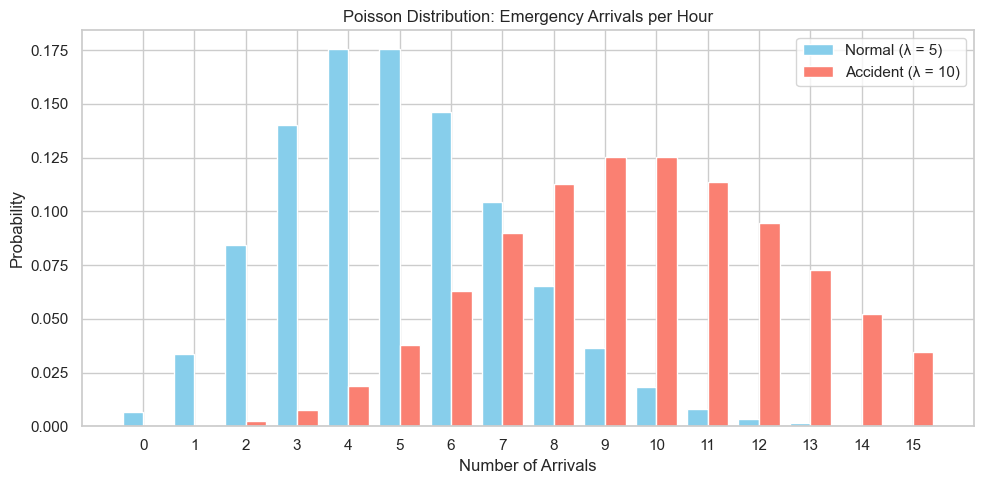

In [112]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
import numpy as np

# Define the range for number of arrivals (0 to 15)
x = np.arange(0, 16)

# Poisson parameters
lambda_normal = 5      # Normal day
lambda_accident = 10   # Major accident scenario

# Calculate probabilities
pmf_normal = poisson.pmf(x, mu=lambda_normal)
pmf_accident = poisson.pmf(x, mu=lambda_accident)

# Plot the distributions
plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, pmf_normal, width=0.4, color='skyblue', label='Normal (λ = 5)')
plt.bar(x + 0.2, pmf_accident, width=0.4, color='salmon', label='Accident (λ = 10)')

# Labels and titles
plt.title("Poisson Distribution: Emergency Arrivals per Hour")
plt.xlabel("Number of Arrivals")
plt.ylabel("Probability")
plt.xticks(x)
plt.legend()
plt.tight_layout()
plt.show()


**TASK 9 INSIGHTS:Distribution: Poisson (λ = 5)
 P(X = 3): ~14.0% chance
Accident Impact: λ increases → more emergencies expected → distribution shifts right**

In [ ]:
TASK 10

In [114]:
# Surgeries and their frequencies
data = {
    'Surgeries': [0, 1, 2, 3, 4, 5],
    'Frequency': [5, 12, 18, 22, 15, 8]
}
df = pd.DataFrame(data)

# Total number of days observed
total_days = df['Frequency'].sum()

# Calculate probability for each surgery count
df['Probability'] = df['Frequency'] / total_days

# Calculate expected value (mean)
df['x * P(x)'] = df['Surgeries'] * df['Probability']
expected_surgeries = df['x * P(x)'].sum()

print(df[['Surgeries', 'Frequency', 'Probability', 'x * P(x)']])
print(f"\nExpected number of surgeries per day: {expected_surgeries:.2f}")

# Interpretation
print("\n→ The data follows a discrete pattern resembling Poisson distribution.")
print("→ If a new surgical team is hired, we'd expect the distribution to shift right and the mean to increase.")


   Surgeries  Frequency  Probability  x * P(x)
0          0          5       0.0625     0.000
1          1         12       0.1500     0.150
2          2         18       0.2250     0.450
3          3         22       0.2750     0.825
4          4         15       0.1875     0.750
5          5          8       0.1000     0.500

Expected number of surgeries per day: 2.67

→ The data follows a discrete pattern resembling Poisson distribution.
→ If a new surgical team is hired, we'd expect the distribution to shift right and the mean to increase.


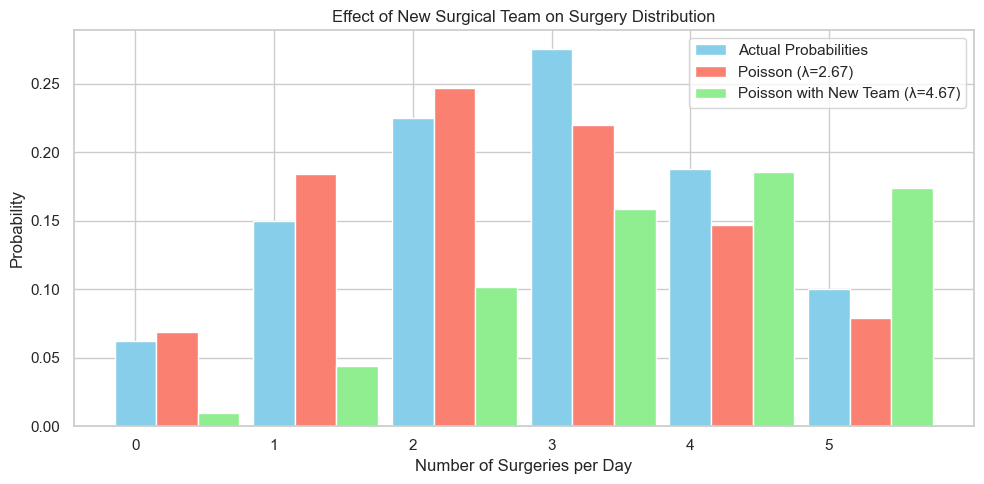

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Current Poisson model (λ = expected_mean)
poisson_probs = poisson.pmf(surgeries, mu=expected_mean)

# Simulate new mean after hiring a surgical team
new_lambda = expected_mean + 2
poisson_new_probs = poisson.pmf(surgeries, mu=new_lambda)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(surgeries, df['Probability'], width=0.3, label='Actual Probabilities', color='skyblue', align='center')
plt.bar(np.array(surgeries) + 0.3, poisson_probs, width=0.3, label=f'Poisson (λ={expected_mean:.2f})', color='salmon', align='center')
plt.bar(np.array(surgeries) + 0.6, poisson_new_probs, width=0.3, label=f'Poisson with New Team (λ={new_lambda:.2f})', color='lightgreen', align='center')

# Labels and title
plt.xticks(surgeries)
plt.xlabel("Number of Surgeries per Day")
plt.ylabel("Probability")
plt.title("Effect of New Surgical Team on Surgery Distribution")
plt.legend()
plt.tight_layout()
plt.show()


 **TASK 10: Insight:
With more surgical capacity, the probability of performing 4, 5, or more surgeries increases.
The distribution shifts right, indicating higher productivity.**